In [34]:
import numpy as np
import matplotlib.pyplot as plt
#import copy

# Model Definitions

In [35]:
original = {
    "conv1":   {"kernel": 3, "in": 3,  "out": 32, "dims": 224},  
    "conv2":   {"kernel": 3, "in": 32, "out": 16, "dims": 112},
    "conv31":  {"kernel": 1, "in": 16, "out": 16, "dims": 56},
    "conv32":  {"kernel": 3, "in": 16, "out": 32, "dims": 56},
    "conv33":  {"kernel": 1, "in": 32, "out": 32, "dims": 56},
    "conv34":  {"kernel": 3, "in": 32, "out": 64, "dims": 56},
    "conv41":  {"kernel": 1, "in": 64, "out": 32, "dims": 28},
    "conv42":  {"kernel": 3, "in": 32, "out": 64, "dims": 28},
    "conv43":  {"kernel": 1, "in": 64, "out": 32, "dims": 28},
    "conv44":  {"kernel": 3, "in": 32, "out": 64, "dims": 28},
    "conv45":  {"kernel": 1, "in": 64, "out": 32, "dims": 28},
    "conv46":  {"kernel": 3, "in": 32, "out": 64, "dims": 28},
    "linear1": {"in": 64, "out": 16},
    "linear2": {"in": 16, "out": 2},
}

In [36]:
### Optimized Model
aimet_no_padding = {
    "conv1":   {"kernel": 3,      "in": 3,  "out": 12, "dims": 230},  
    "conv20":  {"kernel": (3, 1), "in": 12, "out": 24, "dims": 114},
    "conv21":  {"kernel": (1, 3), "in": 24, "out": 16, "dims": 114},
    "conv31":  {"kernel": 1,      "in": 16, "out": 16, "dims": 56},
    "conv320": {"kernel": (3, 1), "in": 16, "out": 16, "dims": 56},
    "conv321": {"kernel": (1, 3), "in": 16, "out": 32, "dims": 56},
    "conv33":  {"kernel": 1,      "in": 32, "out": 32, "dims": 54},
    "conv340": {"kernel": (3, 1), "in": 32, "out": 42, "dims": 54}, # ori 32, 32
    "conv341": {"kernel": (1, 3), "in": 42, "out": 64, "dims": 54}, # ori 32, 64
    "conv41":  {"kernel": 1,      "in": 64, "out": 30, "dims": 26}, # ori 64, 32
    "conv42":  {"kernel": 3,      "in": 30, "out": 60, "dims": 26}, # ori 62, 64
    "conv43":  {"kernel": 1,      "in": 60, "out": 32, "dims": 24}, # ori 64, 32
    "conv440": {"kernel": (3, 1), "in": 32, "out": 42, "dims": 24}, # ori 32, 48
    "conv441": {"kernel": (1, 3), "in": 42, "out": 58, "dims": 24}, # ori 48, 64
    "conv45":  {"kernel": 1,      "in": 58, "out": 32, "dims": 22}, # ori 64, 32
    "conv460": {"kernel": (3, 1), "in": 32, "out": 20, "dims": 22}, # ori 32, 16 
    "conv461": {"kernel": (1, 3), "in": 20, "out": 64, "dims": 22}, # ori 16, 64
    "linear1": {"in": 64, "out": 32},
    "linear2": {"in": 32, "out": 2},
}

### Original Model
aimet_original = {
    "conv1":   {"kernel": 3,      "in": 3,  "out": 24, "dims": 224},  
    "conv20":  {"kernel": (3, 1), "in": 24, "out": 8, "dims": 112},
    "conv21":  {"kernel": (1, 3), "in": 8, "out": 16, "dims": 112},
    "conv31":  {"kernel": 1,      "in": 16, "out": 16, "dims": 56},
    "conv320": {"kernel": (3, 1), "in": 16, "out": 16, "dims": 56},
    "conv321": {"kernel": (1, 3), "in": 16, "out": 32, "dims": 56},
    "conv33":  {"kernel": 1,      "in": 32, "out": 32, "dims": 56},
    "conv340": {"kernel": (3, 1), "in": 32, "out": 32, "dims": 56}, # ori 32, 32
    "conv341": {"kernel": (1, 3), "in": 32, "out": 64, "dims": 56}, # ori 32, 64
    "conv41":  {"kernel": 1,      "in": 64, "out": 32, "dims": 28}, # ori 64, 32
    "conv42":  {"kernel": 3,      "in": 32, "out": 64, "dims": 28}, # ori 32, 64
    "conv43":  {"kernel": 1,      "in": 64, "out": 32, "dims": 28}, # ori 64, 32
    "conv440": {"kernel": (3, 1), "in": 32, "out": 48, "dims": 28}, # ori 32, 48
    "conv441": {"kernel": (1, 3), "in": 48, "out": 64, "dims": 28}, # ori 48, 64
    "conv45":  {"kernel": 1,      "in": 64, "out": 32, "dims": 28}, # ori 64, 32
    "conv460": {"kernel": (3, 1), "in": 32, "out": 16, "dims": 28}, # ori 32, 16 
    "conv461": {"kernel": (1, 3), "in": 16, "out": 64, "dims": 28}, # ori 16, 64
    "linear1": {"in": 64, "out": 16},
    "linear2": {"in": 16, "out": 2},
}

In [37]:
# Original
# balanced = {
#     "conv1":   {"kernel": 3, "in": 3,  "out": 8,  "dims": 224},  
#     "conv2":   {"kernel": 3, "in": 8,  "out": 16, "dims": 112},
#     "conv31":  {"kernel": 1, "in": 16, "out": 16, "dims": 56},
#     "conv32":  {"kernel": 3, "in": 16, "out": 32, "dims": 56},
#     "conv41":  {"kernel": 1, "in": 32, "out": 32, "dims": 28},
#     "conv42":  {"kernel": 3, "in": 32, "out": 64, "dims": 28},
#     "conv51":  {"kernel": 1, "in": 64, "out": 32, "dims": 14},
#     "conv52":  {"kernel": 3, "in": 32, "out": 64, "dims": 14},
#     "conv53":  {"kernel": 1, "in": 64, "out": 32, "dims": 14},
#     "conv54":  {"kernel": 3, "in": 32, "out": 64, "dims": 14},
#     "conv55":  {"kernel": 1, "in": 64, "out": 32, "dims": 14},
#     "conv56":  {"kernel": 3, "in": 32, "out": 64, "dims": 14},
#     "linear1": {"in": 64, "out": 16},
#     "linear2": {"in": 16, "out": 2},
# }

# Optimized for BRAM
# balanced = {
#     "conv1":   {"kernel": 3, "in": 3,  "out": 8,  "dims": 224},  
#     "conv2":   {"kernel": 3, "in": 8,  "out": 16, "dims": 112},
#     "conv31":  {"kernel": 1, "in": 16, "out": 16, "dims": 56},
#     "conv32":  {"kernel": 3, "in": 16, "out": 32, "dims": 56},
#     "conv41":  {"kernel": 1, "in": 32, "out": 30, "dims": 28},
#     "conv42":  {"kernel": 3, "in": 30, "out": 60, "dims": 28},
#     "conv51":  {"kernel": 1, "in": 60, "out": 30, "dims": 14},
#     "conv52":  {"kernel": 3, "in": 30, "out": 60, "dims": 14},
#     "conv53":  {"kernel": 1, "in": 60, "out": 30, "dims": 14},
#     "conv54":  {"kernel": 3, "in": 30, "out": 120, "dims": 14},
#     "conv55":  {"kernel": 1, "in": 120, "out": 60, "dims": 14},
#     "conv56":  {"kernel": 3, "in": 60, "out": 120, "dims": 14},
#     "linear1": {"in": 120, "out": 32},
#     "linear2": {"in": 32, "out": 2},
# }

balanced = {
    "conv1":   {"kernel": 3, "in": 3,  "out": 8,  "dims": 224},  
    "conv2":   {"kernel": 3, "in": 8,  "out": 16, "dims": 112},
    "conv31":  {"kernel": 1, "in": 16, "out": 16, "dims": 56},
    "conv32":  {"kernel": 3, "in": 16, "out": 32, "dims": 56},
    "conv41":  {"kernel": 1, "in": 32, "out": 30, "dims": 28},
    "conv42":  {"kernel": 3, "in": 30, "out": 60, "dims": 28},
    "conv51":  {"kernel": 1, "in": 60, "out": 30, "dims": 14},
    "conv52":  {"kernel": 3, "in": 30, "out": 60, "dims": 14},
    "conv53":  {"kernel": 1, "in": 60, "out": 30, "dims": 14},
    "conv54":  {"kernel": 3, "in": 30, "out": 120, "dims": 14},
    "conv61":  {"kernel": 1, "in": 120, "out": 60, "dims": 7},
    "conv62":  {"kernel": 3, "in": 60, "out": 224, "dims": 7},
    "linear1": {"in": 250, "out": 64},
    "linear2": {"in": 64, "out": 2},
}

# Function to compute MAC and Weights

In [38]:
def compute_macs_and_weights(model):
    for k in model.keys():
        if "conv" in k:
            if type(model[k]["kernel"]) == tuple:
                model[k].update({"mac": 
                    (model[k]["kernel"][0]*model[k]["kernel"][1]) * model[k]["in"] * model[k]["out"] * (model[k]["dims"]**2)})
                model[k].update({"weights": 
                    (model[k]["kernel"][0]*model[k]["kernel"][1]) * model[k]["in"] * model[k]["out"]})
            elif type(model[k]["kernel"]) == int:
                model[k].update({"mac": (model[k]["kernel"]**2) * model[k]["in"] * model[k]["out"] * (model[k]["dims"]**2)})
                model[k].update({"weights": (model[k]["kernel"]**2) * model[k]["in"] * model[k]["out"]})
            else:
                print("Wrong model definition")
        elif "linear" in k:
            model[k].update({"mac": model[k]["in"] * model[k]["out"]})
            model[k].update({"weights": model[k]["in"] * model[k]["out"]})
        else:
            print("Wrong layer definition")

    model_macs = {k: model[k]["mac"]  for k in model.keys()}
    total_macs = np.array([v for v in model_macs.values()]).sum()
    model_weights = {k: model[k]["weights"]  for k in model.keys()}
    total_weights = np.array([v for v in model_weights.values()]).sum()

    return {
        "layers": model,
        "macs": model_macs,
        "total_macs": total_macs,
        "weights": model_weights,
        "total_weights": total_weights,
    }

In [39]:
original_ops = compute_macs_and_weights(original)
aimet_original_ops = compute_macs_and_weights(aimet_original)
aimet_no_padding_ops = compute_macs_and_weights(aimet_no_padding)
balanced_ops = compute_macs_and_weights(balanced)

In [40]:
print("Original model:"
      + f'\n\tMACs = {original_ops["total_macs"]}\n\tWeights = {original_ops["total_weights"]}')
print("Aimet original model:" 
      + f'\n\tMACs = {aimet_original_ops["total_macs"]}\n\tWeights = {aimet_original_ops["total_weights"]}')
print("Aimet no padding and bram optimized model:"
      + f'\n\tMACs = {aimet_no_padding_ops["total_macs"]}\n\tWeights = {aimet_no_padding_ops["total_weights"]}')
print("Balanced model:"
      + f'\n\tMACs = {balanced_ops["total_macs"]}\n\tWeights = {balanced_ops["total_weights"]}')

Original model:
	MACs = 225592352
	Weights = 92288
Aimet original model:
	MACs = 118416416
	Weights = 58472
Aimet no padding and bram optimized model:
	MACs = 113200752
	Weights = 59128
Balanced model:
	MACs = 70522816
	Weights = 219880


# Plot MACs and Weights Per Layer

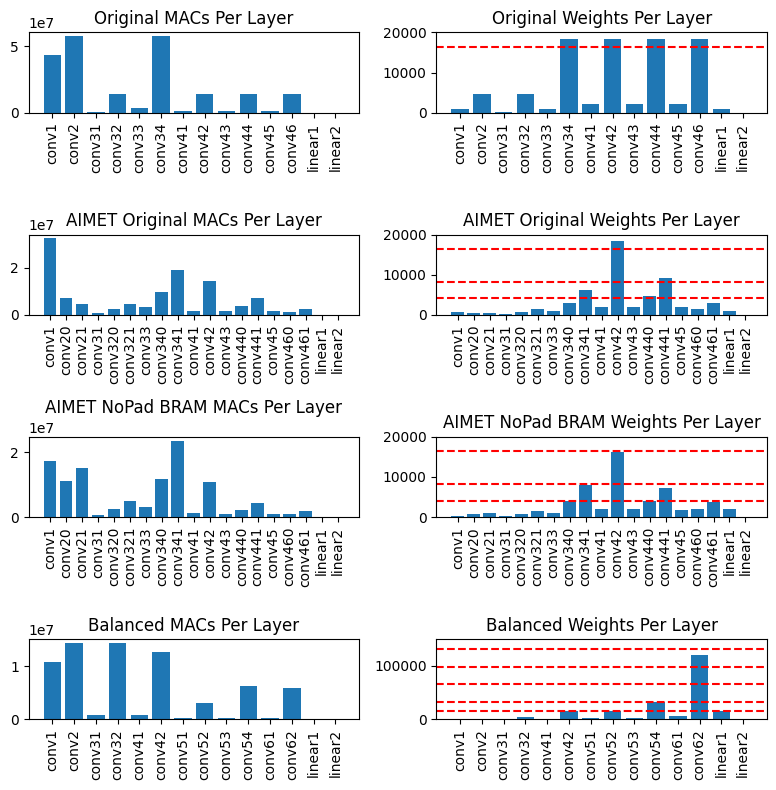

In [41]:
fig, ax = plt.subplots(4, 2, figsize=(8,8))

######################## Original ########################
plt.subplot(4, 2, 1)
ax[0, 0].bar(list(original_ops["layers"].keys()), list(original_ops["macs"].values()))
ax[0, 0].set_xticks(list(original_ops["layers"].keys()))
ax[0, 0].set_xticklabels(list(original_ops["layers"].keys()), rotation=90)
ax[0, 0].set_title("Original MACs Per Layer")

plt.subplot(4, 2, 2)
plt.axhline(y=16384, color='r', linestyle='--')
plt.axhline(y=32768, color='r', linestyle='--')
plt.ylim([0, 20000])
ax[0, 1].bar(list(original_ops["layers"].keys()), list(original_ops["weights"].values()))
ax[0, 1].set_xticks(list(original_ops["layers"].keys()))
ax[0, 1].set_xticklabels(list(original_ops["layers"].keys()), rotation=90)
ax[0, 1].set_title("Original Weights Per Layer")

######################## AIMET ORIGINAL ########################
plt.subplot(4, 2, 3)
ax[1, 0].bar(list(aimet_original_ops["layers"].keys()), list(aimet_original_ops["macs"].values()))
ax[1, 0].set_xticks(list(aimet_original_ops["layers"].keys()))
ax[1, 0].set_xticklabels(list(aimet_original_ops["layers"].keys()), rotation=90)
ax[1, 0].set_title("AIMET Original MACs Per Layer")

plt.subplot(4, 2, 4)
plt.axhline(y=16384, color='r', linestyle='--')
plt.axhline(y=16384/2, color='r', linestyle='--')
plt.axhline(y=16384/4, color='r', linestyle='--')
plt.ylim([0, 20000])
ax[1, 1].bar(list(aimet_original_ops["layers"].keys()), list(aimet_original_ops["weights"].values()))
ax[1, 1].set_xticks(list(aimet_original_ops["layers"].keys()))
ax[1, 1].set_xticklabels(list(aimet_original_ops["layers"].keys()), rotation=90)
ax[1, 1].set_title("AIMET Original Weights Per Layer")

######################## AIMET NO PADDING OPTIMIZED BRAM ########################
plt.subplot(4, 2, 5)
ax[2, 0].bar(list(aimet_no_padding_ops["layers"].keys()), list(aimet_no_padding_ops["macs"].values()))
ax[2, 0].set_xticks(list(aimet_no_padding_ops["layers"].keys()))
ax[2, 0].set_xticklabels(list(aimet_no_padding_ops["layers"].keys()), rotation=90)
ax[2, 0].set_title("AIMET NoPad BRAM MACs Per Layer")

plt.subplot(4, 2, 6)
plt.axhline(y=16384, color='r', linestyle='--')
plt.axhline(y=16384/2, color='r', linestyle='--')
plt.axhline(y=16384/4, color='r', linestyle='--')
plt.ylim([0, 20000])
ax[2, 1].bar(list(aimet_no_padding_ops["layers"].keys()), list(aimet_no_padding_ops["weights"].values()))
ax[2, 1].set_xticks(list(aimet_no_padding_ops["layers"].keys()))
ax[2, 1].set_xticklabels(list(aimet_no_padding_ops["layers"].keys()), rotation=90)
ax[2, 1].set_title("AIMET NoPad BRAM Weights Per Layer")

######################## Balanced ########################
plt.subplot(4, 2, 7)
ax[3, 0].bar(list(balanced_ops["layers"].keys()), list(balanced_ops["macs"].values()))
ax[3, 0].set_xticks(list(balanced_ops["layers"].keys()))
ax[3, 0].set_xticklabels(list(balanced_ops["layers"].keys()), rotation=90)
ax[3, 0].set_title("Balanced MACs Per Layer")

plt.subplot(4, 2, 8)
plt.axhline(y=16384, color='r', linestyle='--')
plt.axhline(y=32768, color='r', linestyle='--')
plt.axhline(y=32768*2, color='r', linestyle='--')
plt.axhline(y=32768*3, color='r', linestyle='--')
plt.axhline(y=32768*4, color='r', linestyle='--')
plt.ylim([0, 150000])
ax[3, 1].bar(list(balanced_ops["layers"].keys()), list(balanced_ops["weights"].values()))
ax[3, 1].set_xticks(list(balanced_ops["layers"].keys()))
ax[3, 1].set_xticklabels(list(balanced_ops["layers"].keys()), rotation=90)
ax[3, 1].set_title("Balanced Weights Per Layer")

plt.tight_layout()
plt.show()

In [42]:
for k, v in aimet_no_padding_ops["weights"].items():
    print(f'{k:<10} {v}')

conv1      324
conv20     864
conv21     1152
conv31     256
conv320    768
conv321    1536
conv33     1024
conv340    4032
conv341    8064
conv41     1920
conv42     16200
conv43     1920
conv440    4032
conv441    7308
conv45     1856
conv460    1920
conv461    3840
linear1    2048
linear2    64


In [43]:
for k, v in balanced_ops["weights"].items():
    print(f'{k:<10} {v}')

conv1      216
conv2      1152
conv31     256
conv32     4608
conv41     960
conv42     16200
conv51     1800
conv52     16200
conv53     1800
conv54     32400
conv61     7200
conv62     120960
linear1    16000
linear2    128
